In [329]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
from pylab import rcParams
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

### Question 1:

In [330]:
df = pd.read_csv('Rose.csv',parse_dates=True,index_col=0)

In [331]:
df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [332]:
rcParams['figure.figsize'] = 15,8

In [333]:
df.plot()
plt.ylabel('WineSales')
plt.grid()

### Question 2:

In [334]:
df.shape

(187, 1)

In [335]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [337]:
df.isnull().sum()

Rose    2
dtype: int64

We have 2 null values. Need to treat it as we cannot have missing data in a Time Series

In [338]:
df['1994']      # July and August data of 1994 are having NaN values

Rose
YearMonth       
1994-01-01  30.0
1994-02-01  35.0
1994-03-01  42.0
1994-04-01  48.0
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0

In [339]:
(df['1993-07'].values+df['1992-07'].values)/2   # taking the average of July sales for the years 1992 and 1993

array([[62.]])

In [340]:
(df['1993-08'].values+df['1992-08'].values)/2   # taking the average of August sales for the years 1992 and 1993

array([[53.]])

In [341]:
df['1994-07'] = 62
df['1994-08'] = 53

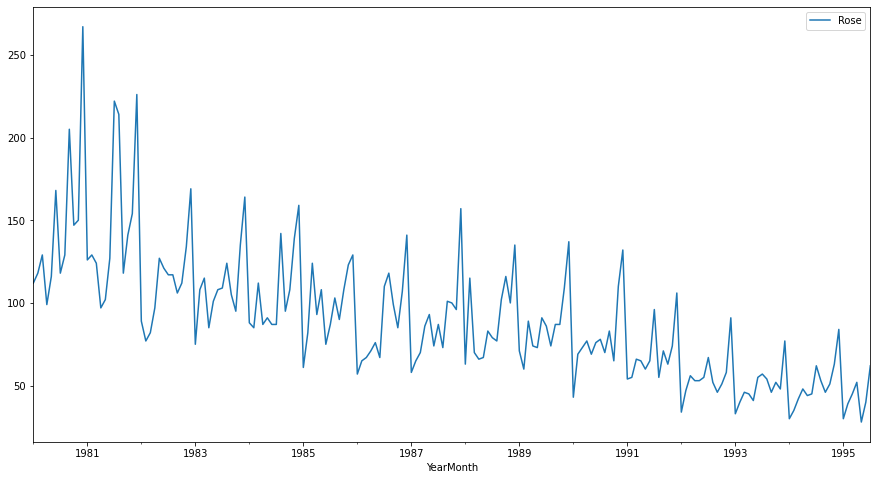

In [342]:
df.plot()

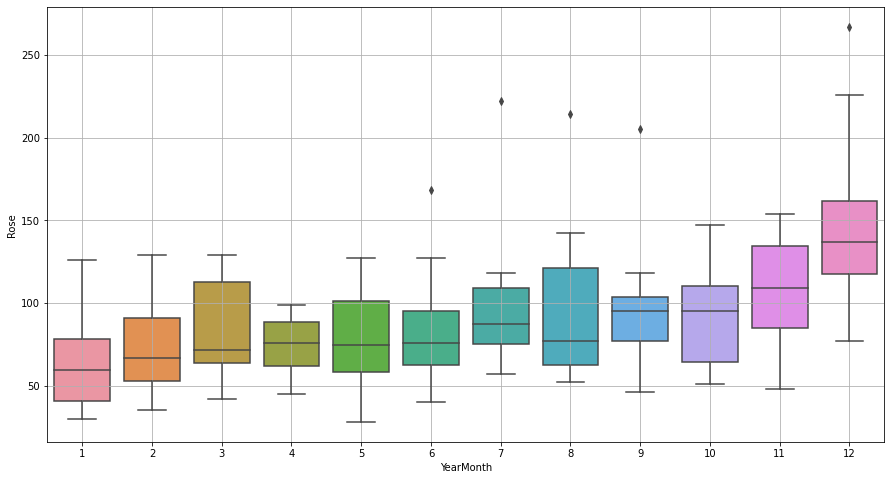

In [343]:
sns.boxplot(x=df.index.month,y=df['Rose'])
plt.grid();

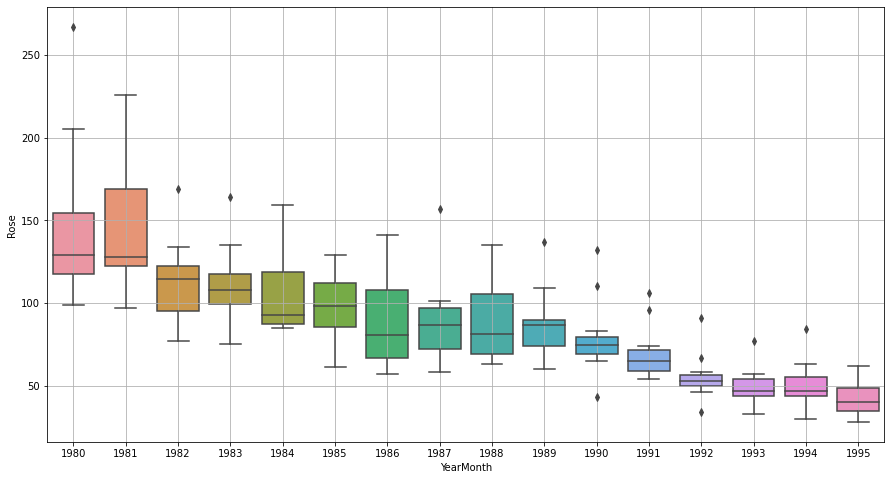

In [344]:
sns.boxplot(x=df.index.year,y=df['Rose'])
plt.grid();

In [345]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth  April  August  December  February  January   July   June  March  \
YearMonth                                                                    
1980        99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981        97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982        97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983        85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984        87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985        93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986        71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987        86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988        66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989        74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990        77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991        65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992        53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993        45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994        48.0    53.0      84.0      35.0     30.0   62.0   45.0   42.0   
1995        52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

YearMonth    May  November  October  September  
YearMonth                                       
1980       116.0     150.0    147.0      205.0  
1981       102.0     154.0    141.0      118.0  
1982       127.0     134.0    112.0      106.0  
1983       101.0     135.0     95.0      105.0  
1984        91.0     139.0    108.0       95.0  
1985       108.0     123.0    108.0       90.0  
1986        76.0     107.0     85.0       99.0  
1987        93.0      96.0    100.0      101.0  
1988        67.0     100.0    116.0      102.0  
1989        73.0     109.0     87.0       87.0  
1990        69.0     110.0     65.0       83.0  
1991        60.0      74.0     63.0       71.0  
1992        53.0      58.0     51.0       46.0  
1993        41.0      48.0     52.0       46.0  
1994        44.0      63.0     51.0       46.0  
1995        28.0       NaN      NaN        NaN

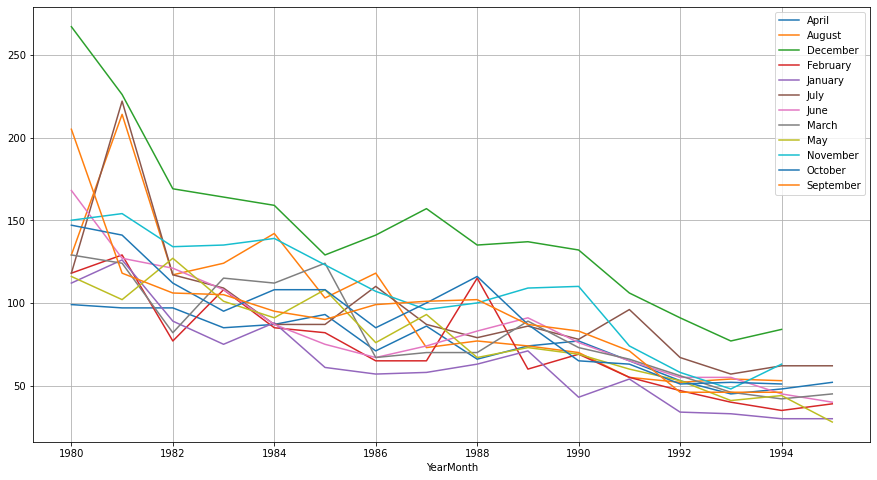

In [346]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Decompose the Time Series to understand the various components.

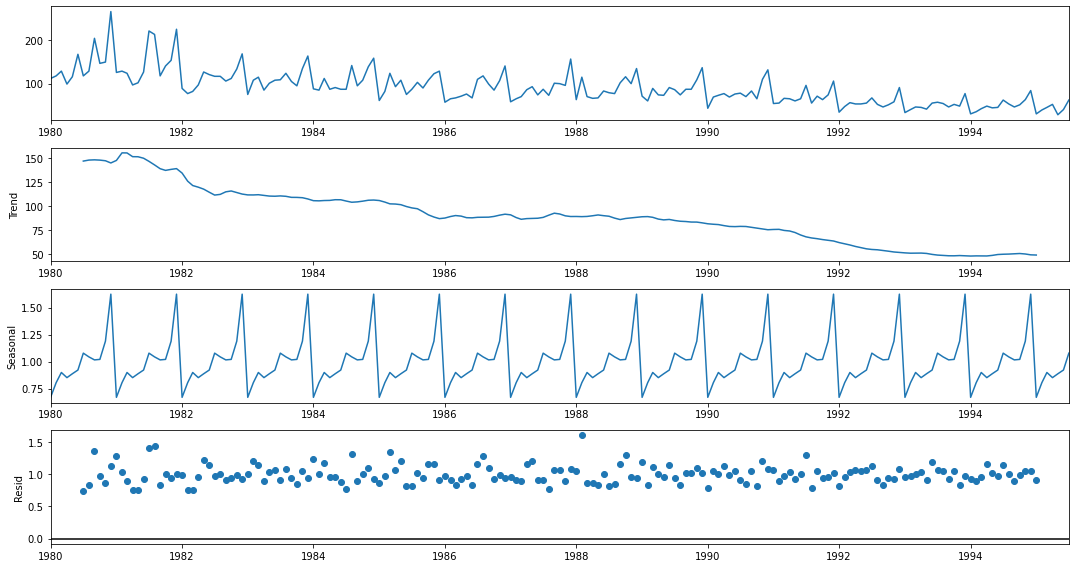

In [347]:
decomposition = seasonal_decompose(df.fillna(df.mean()),model='multiplicative')
decomposition.plot();

### Question 3:

In [348]:
train = df[df.index<pd.to_datetime('1991-01-01')]
test = df[df.index>pd.to_datetime('1990-12-01')]

In [349]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [350]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



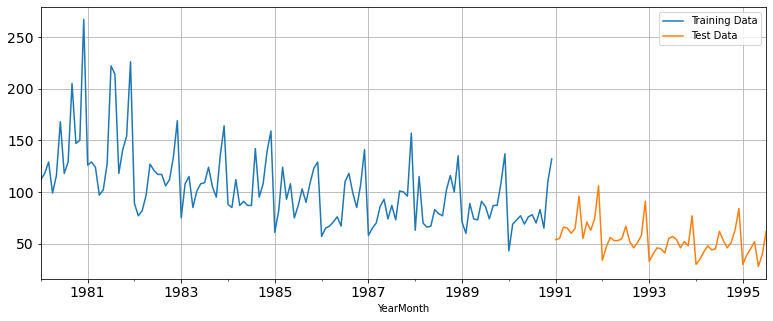

In [351]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Question 4:

### Model 1: Built a Linear Regression using the Time Stamped order of occurence of the Wine sales. 

In [352]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [353]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [354]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [355]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [356]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [357]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

In [358]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

#### Evaluate this model on the test data using Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE).

In [359]:
from sklearn import metrics

In [360]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [361]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.303 MAPE is 22.69


In [362]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.303047      22.69

### Method 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [363]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [364]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
Name: naive, dtype: float64

In [365]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

In [366]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [367]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For Naive Approach forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive Approach forecast on the Test Data,  RMSE is 79.282 MAPE is 143.13


In [368]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.303047      22.69
NaiveModel        79.281547     143.13

### Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [369]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [370]:
## Let us get the mean value (or simple avegrage) of the training set.

SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

Rose  mean_forecast
YearMonth                       
1980-01-01  112.0     104.939394
1980-02-01  118.0     104.939394
1980-03-01  129.0     104.939394
1980-04-01   99.0     104.939394
1980-05-01  116.0     104.939394

In [371]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

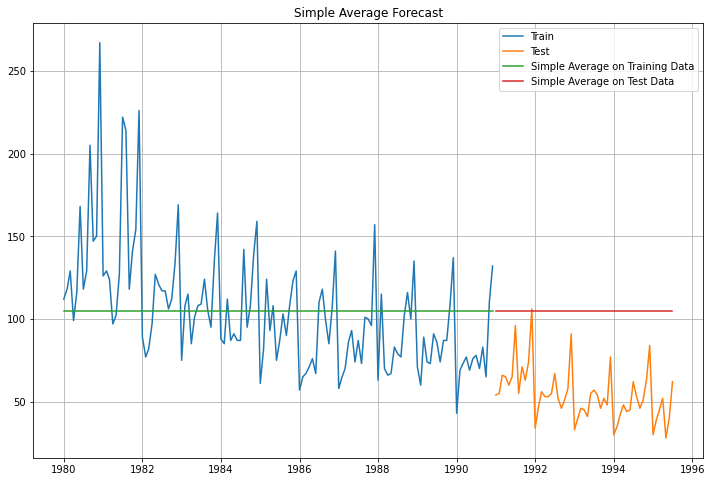

In [372]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [373]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [374]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.030 MAPE is 93.36


In [375]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    15.303047      22.69
NaiveModel          79.281547     143.13
SimpleAverageModel  53.029519      93.36

### Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [376]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [377]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

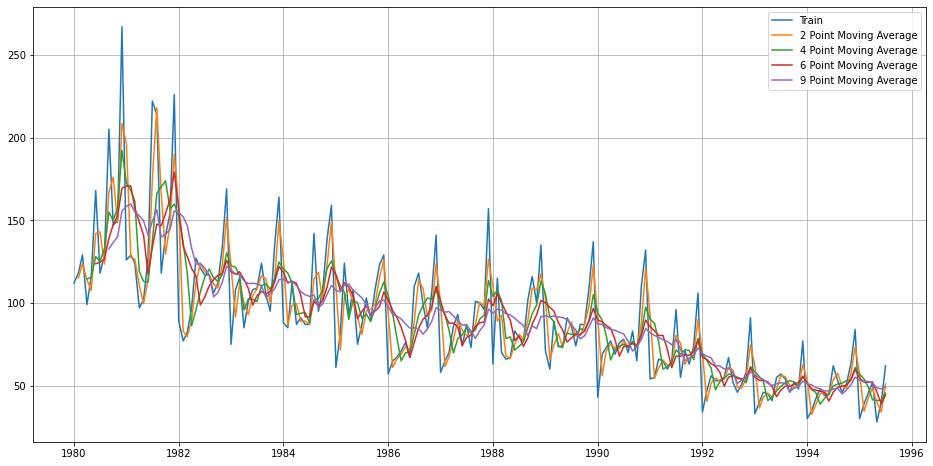

In [378]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average needs to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [379]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<pd.to_datetime('1991-01-01')] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>pd.to_datetime('1990-12-01')]

In [380]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

##### Done only on the test data.

In [381]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.612 MAPE is 13.97
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.534 MAPE is 19.82
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.575 MAPE is 20.98
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.825 MAPE is 21.32


In [382]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             15.303047      22.69
NaiveModel                   79.281547     143.13
SimpleAverageModel           53.029519      93.36
2pointTrailingMovingAverage  11.611515      13.97
4pointTrailingMovingAverage  14.534481      19.82
6pointTrailingMovingAverage  14.574746      20.98
9pointTrailingMovingAverage  14.824806      21.32

#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

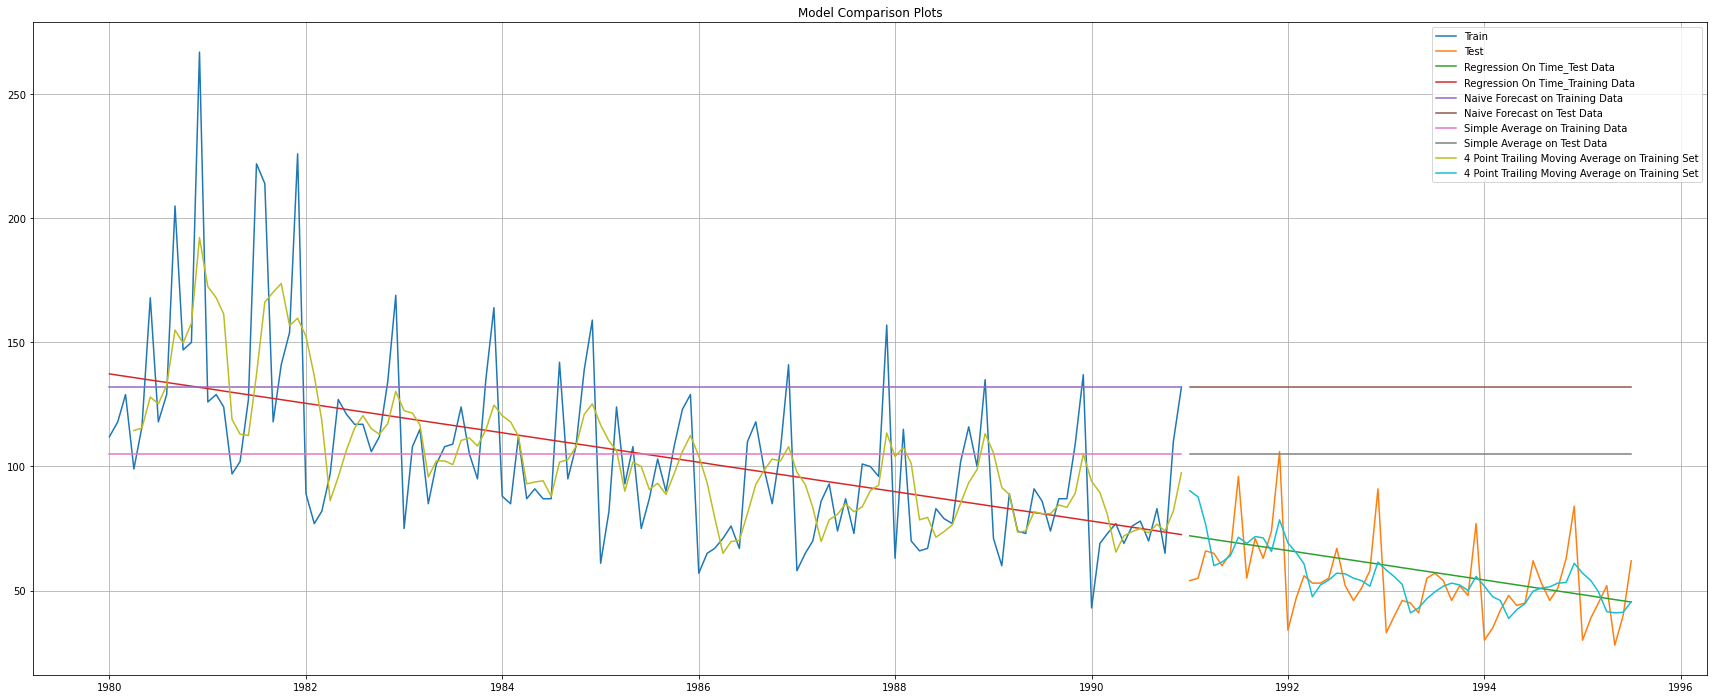

In [383]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Model 5: Simple Exponential Smoothing

In [384]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [385]:
SES_train = train.copy()
SES_test = test.copy()

In [386]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [387]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [388]:
model_SES_autofit.params

{'smoothing_level': 0.09874995867958046,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38699135899094,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [389]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Rose     predict
YearMonth                    
1980-01-01  112.0  134.386991
1980-02-01  118.0  132.176277
1980-03-01  129.0  130.776370
1980-04-01   99.0  130.600954
1980-05-01  116.0  127.480361

In [390]:
len(SES_test)

55

In [391]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.105001
1991-02-01  55.0  87.105001
1991-03-01  66.0  87.105001
1991-04-01  65.0  87.105001
1991-05-01  60.0  87.105001

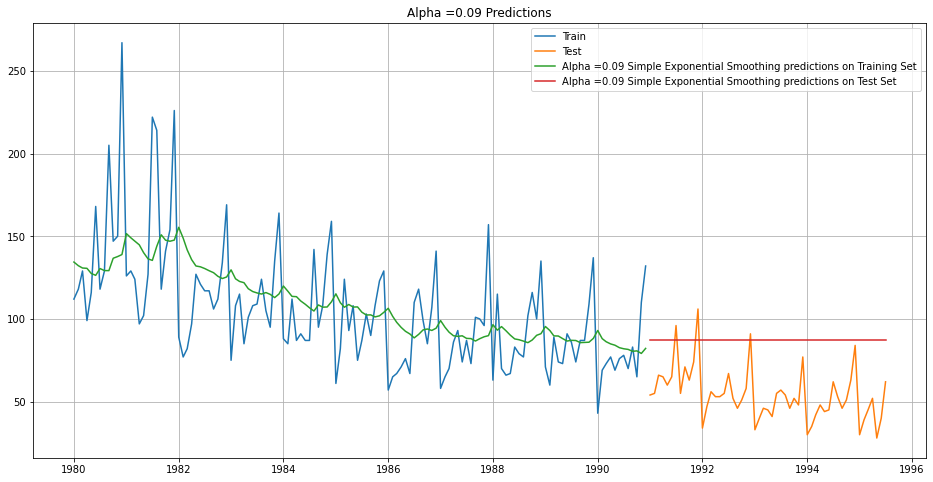

In [392]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.09 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.09 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.09 Predictions');

#### Model Evaluation for $\alpha$ = 0.09 : Simple Exponential Smoothing

In [393]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Rose'],SES_train['predict'])
print("For Alpha =0.09 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0.09 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 22.73


In [394]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =0.09 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))

For Alpha =0.09 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 36.382 MAPE is 62.56


In [395]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=0.09,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.303047      22.69
NaiveModel                             79.281547     143.13
SimpleAverageModel                     53.029519      93.36
2pointTrailingMovingAverage            11.611515      13.97
4pointTrailingMovingAverage            14.534481      19.82
6pointTrailingMovingAverage            14.574746      20.98
9pointTrailingMovingAverage            14.824806      21.32
Alpha=0.09,SimpleExponentialSmoothing  36.381664      62.56

#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [396]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [397]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

#### Model Evaluation

In [398]:
resultsDf_6

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0           0.1   31.501015       22.71  36.413412      62.62
1           0.2   31.898670       22.24  40.940330      70.83
2           0.3   32.448833       22.31  47.077358      82.23
3           0.4   33.028400       22.51  53.336208      93.93
4           0.5   33.680192       22.69  59.208294     105.15
5           0.6   34.439946       22.89  64.536345     115.29
6           0.7   35.322683       23.09  69.262271     124.25
7           0.8   36.334371       23.42  73.337467     131.95
8           0.9   37.482735       23.93  76.702326     138.28

In [399]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.09 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.09 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [400]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing','Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.303047      22.69
NaiveModel                             79.281547     143.13
SimpleAverageModel                     53.029519      93.36
2pointTrailingMovingAverage            11.611515      13.97
4pointTrailingMovingAverage            14.534481      19.82
6pointTrailingMovingAverage            14.574746      20.98
9pointTrailingMovingAverage            14.824806      21.32
Alpha=0.09,SimpleExponentialSmoothing  36.381664      62.56
Alpha=0.1,SimpleExponentialSmoothing   36.413412      62.62
Alpha=0.2,SimpleExponentialSmoothing   40.940330      70.83

### Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [401]:
DES_train = train.copy()
DES_test = test.copy()

In [402]:
model_DES = Holt(DES_train['Rose'])

In [403]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [404]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [405]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.1          0.1   32.026565       22.78   36.626149      62.70
1            0.1          0.2   33.450729       24.45   48.198474      81.62
2            0.1          0.3   33.145789       24.46   77.621470     129.39
3            0.1          0.4   33.262191       24.68   99.034373     163.40
4            0.1          0.5   33.688415       24.92  123.711010     202.96
..           ...          ...         ...         ...         ...        ...
95           1.0          0.6   51.828562       34.61  801.102238    1312.41
96           1.0          0.7   54.493671       36.36  841.314130    1376.91
97           1.0          0.8   57.362069       38.19  853.386964    1396.27
98           1.0          0.9   60.470112       40.12  834.132572    1365.39
99           1.0          1.0   63.869184       42.41  779.501869    1277.76

[100 rows x 6 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [406]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0            0.1          0.1   32.026565       22.78  36.626149      62.70
1            0.1          0.2   33.450729       24.45  48.198474      81.62
10           0.2          0.1   32.796403       23.06  65.225740     111.49
2            0.1          0.3   33.145789       24.46  77.621470     129.39
20           0.3          0.1   33.528397       23.47  98.123817     167.95

In [407]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0            0.1          0.1   32.026565       22.78  36.626149      62.70
1            0.1          0.2   33.450729       24.45  48.198474      81.62
10           0.2          0.1   32.796403       23.06  65.225740     111.49
2            0.1          0.3   33.145789       24.46  77.621470     129.39
3            0.1          0.4   33.262191       24.68  99.034373     163.40

In [408]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [409]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                               15.303047      22.69
NaiveModel                                     79.281547     143.13
SimpleAverageModel                             53.029519      93.36
2pointTrailingMovingAverage                    11.611515      13.97
4pointTrailingMovingAverage                    14.534481      19.82
6pointTrailingMovingAverage                    14.574746      20.98
9pointTrailingMovingAverage                    14.824806      21.32
Alpha=0.09,SimpleExponentialSmoothing          36.381664      62.56
Alpha=0.1,SimpleExponentialSmoothing           36.413412      62.62
Alpha=0.2,SimpleExponentialSmoothing           40.940330      70.83
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  36.626149      62.70

### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [410]:
TES_train = train.copy()
TES_test = test.copy()

In [411]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='MS')

In [412]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [413]:
model_TES_autofit.params

{'smoothing_level': 0.10609627319517778,
 'smoothing_slope': 0.048438539603074524,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565054625749,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550282, 1.65927149, 1.80572645, 1.58888831, 1.77822715,
        1.92604384, 2.11649476, 2.25135211, 2.11690599, 2.08112846,
        2.40927297, 3.30448154]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [414]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Rose  auto_predict
YearMonth                      
1980-01-01  112.0    113.105629
1980-02-01  118.0    127.054233
1980-03-01  129.0    137.165625
1980-04-01   99.0    119.844373
1980-05-01  116.0    131.432578

In [415]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     56.674341
1991-02-01  55.0     63.471274
1991-03-01  66.0     68.788790
1991-04-01  65.0     60.277827
1991-05-01  60.0     67.180380

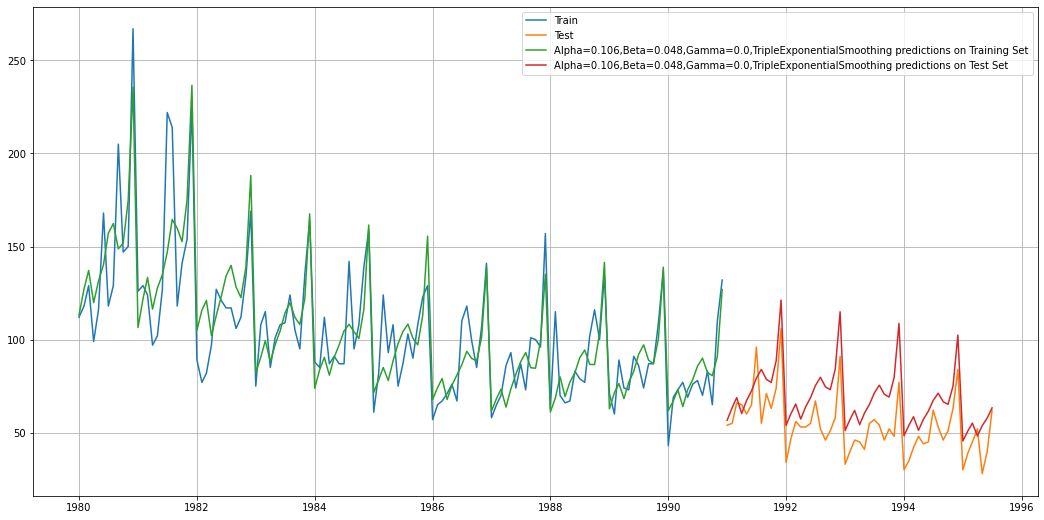

In [416]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

#### Model evaluation for Alpha=0.106,Beta=0.048,Gamma=0.0

In [417]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print("For Alpha=0.106,Beta=0.048 and Gamma=0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha=0.106,Beta=0.048 and Gamma=0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.579 MAPE is 13.21


In [418]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha=0.106,Beta=0.048 and Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha=0.106,Beta=0.048 and Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 16.959 MAPE is 27.85


In [419]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    15.303047      22.69
NaiveModel                                          79.281547     143.13
SimpleAverageModel                                  53.029519      93.36
2pointTrailingMovingAverage                         11.611515      13.97
4pointTrailingMovingAverage                         14.534481      19.82
6pointTrailingMovingAverage                         14.574746      20.98
9pointTrailingMovingAverage                         14.824806      21.32
Alpha=0.09,SimpleExponentialSmoothing               36.381664      62.56
Alpha=0.1,SimpleExponentialSmoothing                36.413412      62.62
Alpha=0.2,SimpleExponentialSmoothing                40.940330      70.83
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.626149      62.70
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...  16.959271      27.85

In [420]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [421]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [422]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0             0.1          0.1           0.1     19.290103       13.99   
1             0.1          0.1           0.2     19.850832       14.43   
2             0.1          0.1           0.3     20.484564       14.65   
3             0.1          0.1           0.4     21.210009       14.88   
4             0.1          0.1           0.5     22.029226       15.09   
..            ...          ...           ...           ...         ...   
995           1.0          1.0           0.6  28358.458519     3085.88   
996           1.0          1.0           0.7  30724.126331     4617.55   
997           1.0          1.0           0.8   1218.755446      493.75   
998           1.0          1.0           0.9  14150.253251     2303.41   
999           1.0          1.0           1.0   1768.254189      614.79   

        Test RMSE  Test MAPE  
0       11.468974      17.59  
1       11.487548      17.45  
2       11.695883      17.74  
3       12.067520      18.39  
4       12.583356      19.17  
..            ...        ...  
995   9603.611291    7750.32  
996  23029.954686   11741.11  
997   9626.869903    8512.84  
998   9691.917124    7853.37  
999   8138.694747    6757.12  

[1000 rows x 7 columns]

In [423]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
11            0.1          0.2           0.2   24.365597       15.36   
12            0.1          0.2           0.3   23.969166       15.13   
10            0.1          0.2           0.1   25.529854       16.06   
13            0.1          0.2           0.4   23.919163       14.99   
142           0.2          0.5           0.3   27.631767       17.87   

     Test RMSE  Test MAPE  
11    9.777235      14.16  
12   10.043120      14.38  
10   10.195013      14.91  
13   10.474434      15.05  
142  10.517690      15.03

In [424]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
11            0.1          0.2           0.2   24.365597       15.36   
151           0.2          0.6           0.2   28.289836       18.09   
223           0.3          0.3           0.4   24.209084       16.78   
12            0.1          0.2           0.3   23.969166       15.13   
214           0.3          0.2           0.5   24.580627       16.87   

     Test RMSE  Test MAPE  
11    9.777235      14.16  
151  10.550698      14.31  
223  10.629527      14.36  
12   10.043120      14.38  
214  10.818891      14.70

In [425]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [426]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][11]],'Test MAPE':[resultsDf_8_2['Test MAPE'][11]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    15.303047      22.69
NaiveModel                                          79.281547     143.13
SimpleAverageModel                                  53.029519      93.36
2pointTrailingMovingAverage                         11.611515      13.97
4pointTrailingMovingAverage                         14.534481      19.82
6pointTrailingMovingAverage                         14.574746      20.98
9pointTrailingMovingAverage                         14.824806      21.32
Alpha=0.09,SimpleExponentialSmoothing               36.381664      62.56
Alpha=0.1,SimpleExponentialSmoothing                36.413412      62.62
Alpha=0.2,SimpleExponentialSmoothing                40.940330      70.83
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.626149      62.70
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...  16.959271      27.85
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.777235      14.16

In [427]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                     Test RMSE  Test MAPE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.777235      14.16
2pointTrailingMovingAverage                         11.611515      13.97
4pointTrailingMovingAverage                         14.534481      19.82
6pointTrailingMovingAverage                         14.574746      20.98
9pointTrailingMovingAverage                         14.824806      21.32
RegressionOnTime                                    15.303047      22.69
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...  16.959271      27.85
Alpha=0.09,SimpleExponentialSmoothing               36.381664      62.56
Alpha=0.1,SimpleExponentialSmoothing                36.413412      62.62
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.626149      62.70
Alpha=0.2,SimpleExponentialSmoothing                40.940330      70.83
SimpleAverageModel                                  53.029519      93.36
NaiveMode

#### We see that the best model as per RMSE is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.1, $\beta$ = 0.2 and $\gamma$ = 0.2.
#### And surprisingly the best model as per MAPE is the 2 point Trailing Moving Average

In [428]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_train['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

### Question 5:

In [481]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [482]:
test_stationarity(df['Rose'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.887760
p-value                          0.337841
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

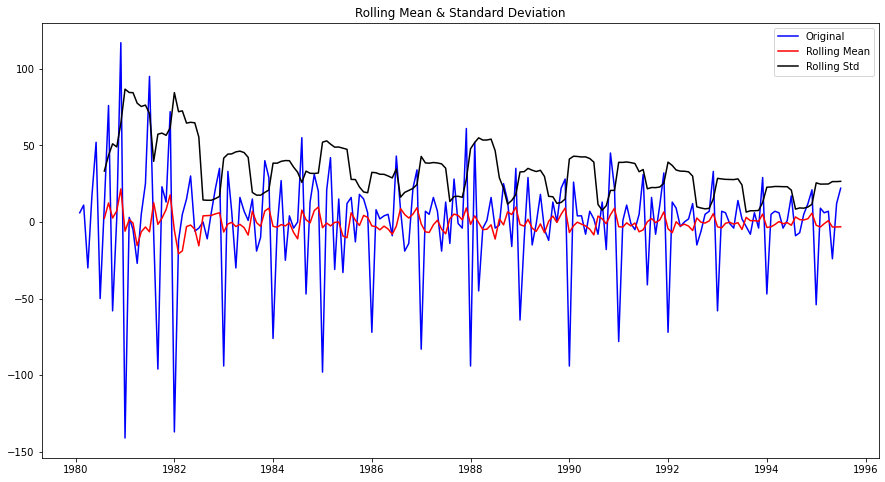

Results of Dickey-Fuller Test:
Test Statistic                -8.028518e+00
p-value                        1.987167e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [483]:
test_stationarity(df['Rose'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

### Question 6:

#### Built an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion.

In [432]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [433]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [434]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748274
ARIMA(0, 1, 2) - AIC:1279.671528853581
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(2, 1, 0) - AIC:1298.6110341604933
ARIMA(2, 1, 1) - AIC:1281.507862186853
ARIMA(2, 1, 2) - AIC:1281.8707222264768


In [435]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [436]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 13 Sep 2020   AIC                           1279.672
Time:                        20:14:02   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

#### Model evaluation on Test data

In [437]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [438]:
## Test Data

rmse_model7_test = metrics.mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape_model7_test = MAPE(test['Rose'],predicted_auto_ARIMA)
print("For order (0,1,2) ARIMA model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_test, mape_model7_test))

For order (0,1,2) ARIMA model forecast on the Test Data,  RMSE is 36.893 MAPE is 63.49


In [439]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_model7_test],'Test MAPE':[mape_model7_test]}
                           ,index=['(0,1,2) ARIMA Model'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    15.303047      22.69
NaiveModel                                          79.281547     143.13
SimpleAverageModel                                  53.029519      93.36
2pointTrailingMovingAverage                         11.611515      13.97
4pointTrailingMovingAverage                         14.534481      19.82
6pointTrailingMovingAverage                         14.574746      20.98
9pointTrailingMovingAverage                         14.824806      21.32
Alpha=0.09,SimpleExponentialSmoothing               36.381664      62.56
Alpha=0.1,SimpleExponentialSmoothing                36.413412      62.62
Alpha=0.2,SimpleExponentialSmoothing                40.940330      70.83
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.626149      62.70
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...  16.959271      27.85
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.777235      14.16
(0,1,2) ARIMA Model                                 36.893019      63.49

#### Built an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Setting the seasonality as 12 for the auto SARIMA model.

In [440]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [441]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [442]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207318
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380894
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301623029
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014775963
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.02078693863
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635752877
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658811
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.337538360159
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654392
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.879454069752
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945565
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374416
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729141927
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244225561
SARIMA(0, 

SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1409465026388
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1073.2912713680046
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1044.190935357747
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:907.6661488803841
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705667433328
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932513238867
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8281326525432
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:897.3464441836494
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:898.3781888694666
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:890.6687981312756
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:794.7799442942274
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:783.7036522759206
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:776.9960999136688


In [443]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
53   (0, 1, 2)  (2, 1, 2, 12)  774.969122
107  (1, 1, 2)  (2, 1, 2, 12)  776.940107
161  (2, 1, 2)  (2, 1, 2, 12)  776.996100
35   (0, 1, 1)  (2, 1, 2, 12)  782.153872
160  (2, 1, 2)  (2, 1, 1, 12)  783.703652

In [444]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 13 Sep 2020   AIC                            774.969
Time:                                    20:18:30   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.168      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

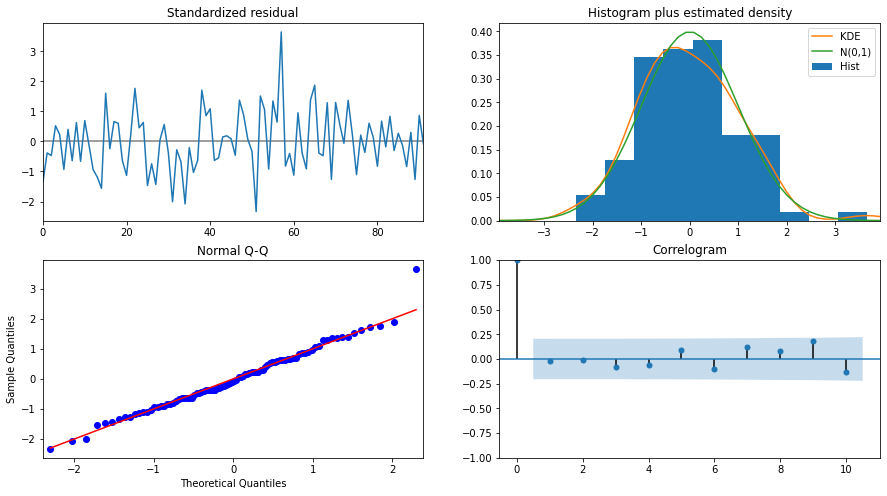

In [445]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

We see that the model diagnostics plot does not indicate any remaining information that we can get.

#### Model Evaluation on Test set

In [446]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [447]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.213255  14.221041      16.340527      72.085982
1  62.325004  14.299871      34.297772      90.352237
2  67.313452  14.301786      39.282467      95.344438
3  63.158909  14.304701      35.122210      91.195608
4  66.476764  14.310089      38.429504      94.524024

In [448]:
## Test Data

rmse_model8_test = metrics.mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
mape_model8_test = MAPE(test['Rose'],predicted_auto_SARIMA_12.predicted_mean)
print("For order (0,1,2)(2,1,2,12) SARIMA model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model8_test, mape_model8_test))

For order (0,1,2)(2,1,2,12) SARIMA model forecast on the Test Data,  RMSE is 16.252 MAPE is 23.83


In [449]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_model8_test],'Test MAPE':[mape_model8_test]}
                           ,index=['(0,1,2)(2,1,2,12) SARIMA Model'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    15.303047      22.69
NaiveModel                                          79.281547     143.13
SimpleAverageModel                                  53.029519      93.36
2pointTrailingMovingAverage                         11.611515      13.97
4pointTrailingMovingAverage                         14.534481      19.82
6pointTrailingMovingAverage                         14.574746      20.98
9pointTrailingMovingAverage                         14.824806      21.32
Alpha=0.09,SimpleExponentialSmoothing               36.381664      62.56
Alpha=0.1,SimpleExponentialSmoothing                36.413412      62.62
Alpha=0.2,SimpleExponentialSmoothing                40.940330      70.83
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.626149      62.70
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...  16.959271      27.85
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.777235      14.16
(0,1,2) ARIMA Model                                 36.893019      63.49
(0,1,2)(2,1,2,12) SARIMA Model                      16.251538      23.83

### Question 7:

#### Built a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots.

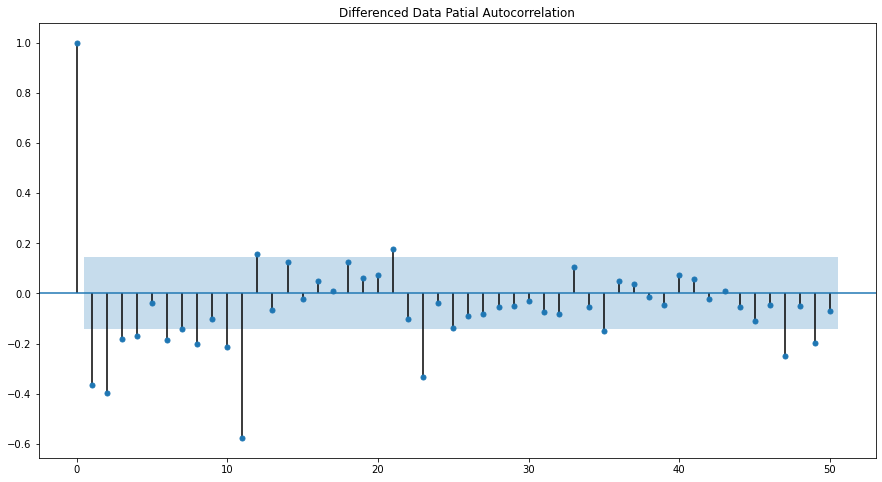

In [450]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

In [451]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

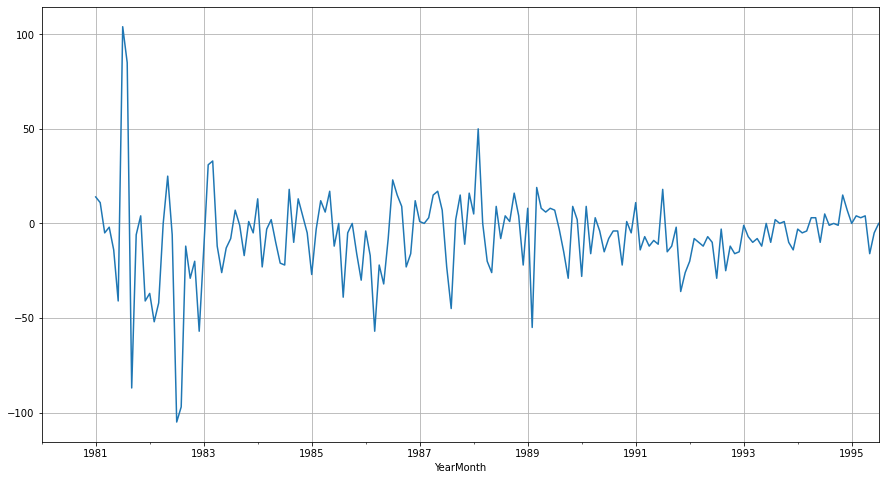

In [452]:
(df['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

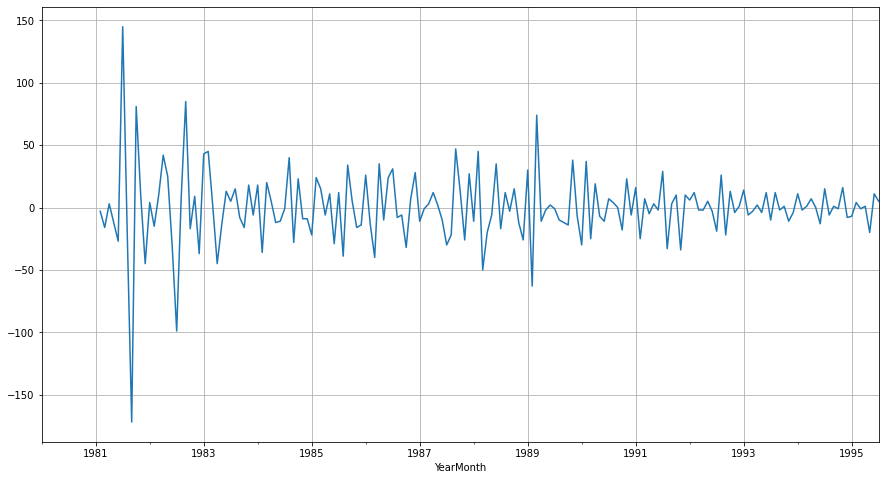

In [453]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

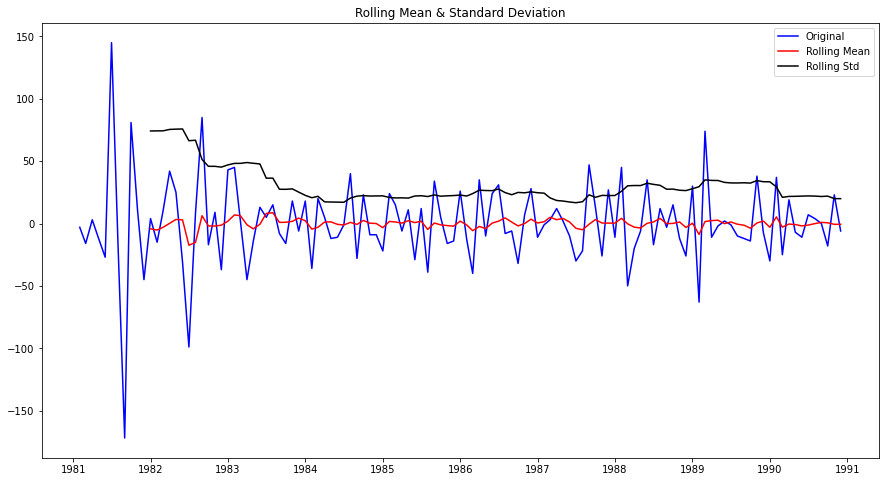

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [454]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

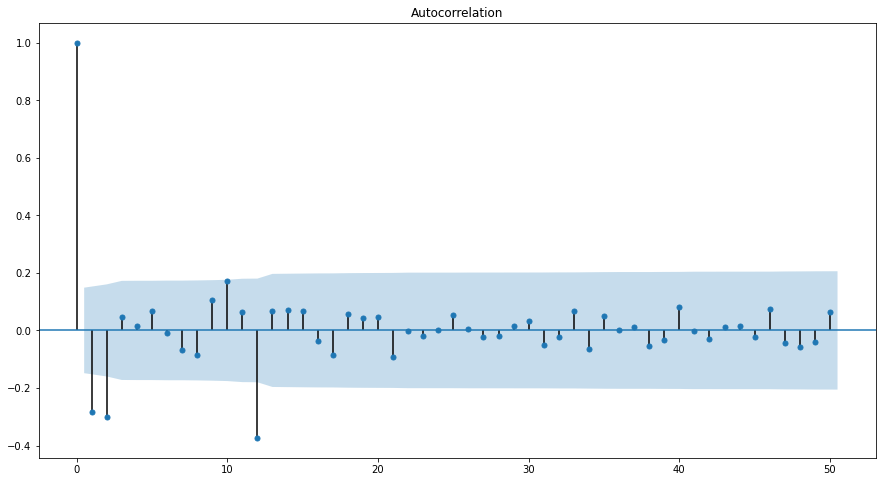

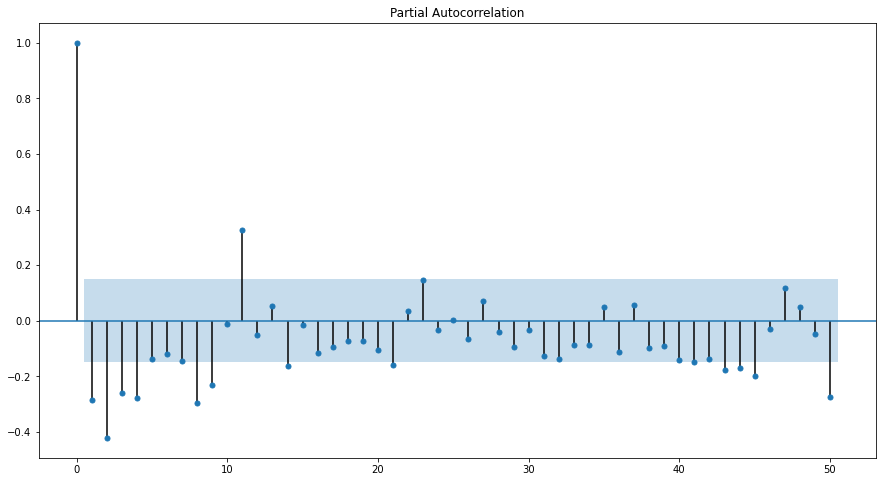

In [455]:
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=50);

In [456]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -446.102
Date:                              Sun, 13 Sep 2020   AIC                            908.203
Time:                                      20:18:38   BIC                            929.358
Sample:                                           0   HQIC                           916.774
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8046      0.119     -6.778      0.000      -1.037      -0.572
ar.L2          0.03

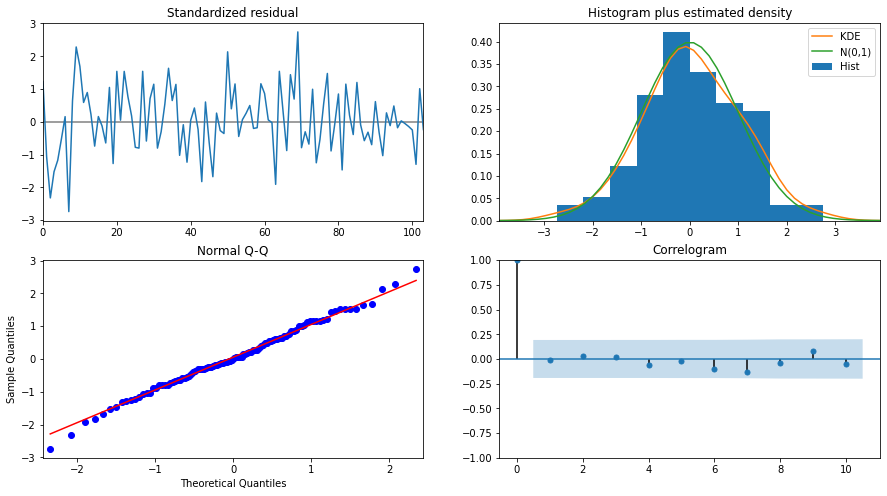

In [457]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

#### Model Evaluation on Test set

In [458]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [459]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  47.471733  17.323086      13.519109      81.424356
1  63.350023  18.228423      27.622970      99.077075
2  65.513287  18.257886      29.728487     101.298087
3  67.317160  18.260276      31.527676     103.106643
4  61.756431  18.260577      25.966358      97.546505

In [460]:
## Test Data

rmse_model8_test_1 = metrics.mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
mape_model8_test_1 = MAPE(test['Rose'],predicted_manual_SARIMA_6.predicted_mean)
print("For order (4,1,2)(0,1,1,12) SARIMA model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model8_test_1, mape_model8_test_1))

For order (4,1,2)(0,1,1,12) SARIMA model forecast on the Test Data,  RMSE is 15.785 MAPE is 22.65


In [461]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': [rmse_model8_test_1],'Test MAPE':[mape_model8_test_1]}
                           ,index=['(4,1,2)(0,1,1,12) SARIMA Model'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    15.303047      22.69
NaiveModel                                          79.281547     143.13
SimpleAverageModel                                  53.029519      93.36
2pointTrailingMovingAverage                         11.611515      13.97
4pointTrailingMovingAverage                         14.534481      19.82
6pointTrailingMovingAverage                         14.574746      20.98
9pointTrailingMovingAverage                         14.824806      21.32
Alpha=0.09,SimpleExponentialSmoothing               36.381664      62.56
Alpha=0.1,SimpleExponentialSmoothing                36.413412      62.62
Alpha=0.2,SimpleExponentialSmoothing                40.940330      70.83
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.626149      62.70
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...  16.959271      27.85
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.777235      14.16
(0,1,2) ARIMA Model                                 36.893019      63.49
(0,1,2)(2,1,2,12) SARIMA Model                      16.251538      23.83
(4,1,2)(0,1,1,12) SARIMA Model                      15.784893      22.65

### Question 8:

In [462]:
type(resultsDf)

pandas.core.frame.DataFrame

#### I have made the dataframe 'resultsDf' and concatenated all the model's performance measures on the same.

#### The model name and their parameters are written as an index

Sorting the results dataframe as per RMSE and MAPE separately, to find out the most optimal model

In [463]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                     Test RMSE  Test MAPE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.777235      14.16
2pointTrailingMovingAverage                         11.611515      13.97
4pointTrailingMovingAverage                         14.534481      19.82
6pointTrailingMovingAverage                         14.574746      20.98
9pointTrailingMovingAverage                         14.824806      21.32
RegressionOnTime                                    15.303047      22.69
(4,1,2)(0,1,1,12) SARIMA Model                      15.784893      22.65
(0,1,2)(2,1,2,12) SARIMA Model                      16.251538      23.83
Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponent...  16.959271      27.85
Alpha=0.09,SimpleExponentialSmoothing               36.381664      62.56
Alpha=0.1,SimpleExponentialSmoothing                36.413412      62.62
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.626149      62.70
(0,1,2) A

#### We can see that as per the least RMSE, the best model is Triple Exponential smoothing with parameters Alpha=0.1,Beta=0.2,Gamma=0.2. 
#### And as per the least MAPE, the best model is Trailing Moving Average with the window size as 2.

### Question 9:

#### Built the Holt Winter's model on the whole data using the most optimal parameters and forecasted for the next 12 months

In [464]:
model_TES_full = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='MS')

In [465]:
model_TES_full_fit = model_TES_full.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
model_TES_full_predict = model_TES_full_fit.forecast(steps=12)

In [466]:
model_TES_full_predict

1995-08-01    49.040554
1995-09-01    48.727376
1995-10-01    50.021362
1995-11-01    57.732582
1995-12-01    81.363259
1996-01-01    31.269259
1996-02-01    38.760810
1996-03-01    44.481644
1996-04-01    45.618469
1996-05-01    39.720825
1996-06-01    45.929866
1996-07-01    55.858732
Freq: MS, dtype: float64

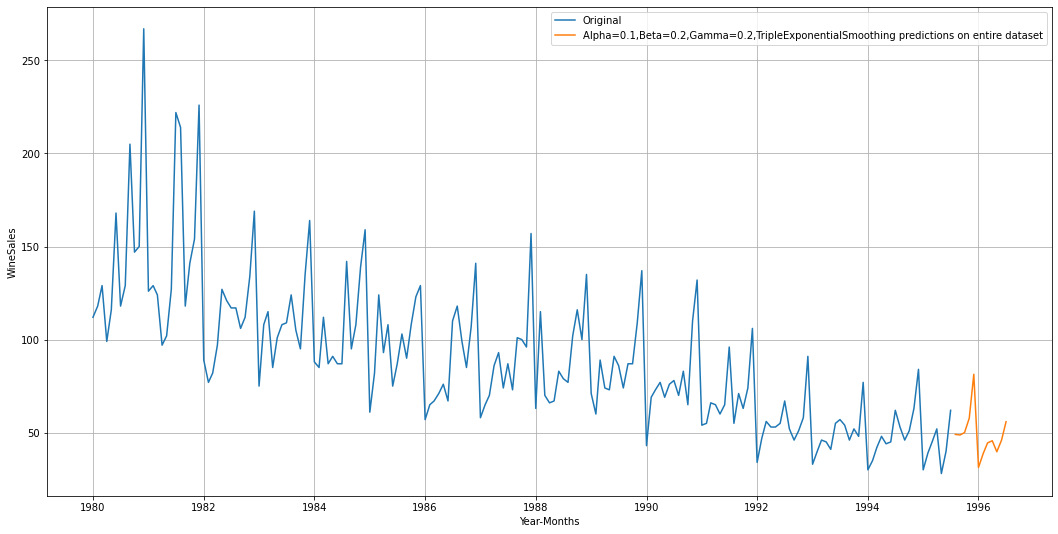

In [467]:
## Plotting on the entire data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(df['Rose'], label='Original')

plt.plot(model_TES_full_predict, label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on entire dataset')

plt.xlabel('Year-Months')
plt.ylabel('WineSales')
plt.legend(loc='best')
plt.grid();

#### Used 2 point Trailing Moving Average method to forecast for the next 12 months 

In [468]:
twoMA = df.copy()

In [469]:
twoMA.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [470]:
# Future dates to forecast on
date = pd.date_range(start='1995-08-01',freq='MS',periods=12)
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [471]:
# just putting random values which will be replaced by the forecasted values
forecastMA = pd.DataFrame(index=date,data=np.arange(1,13),columns=['Rose'])

In [472]:
forecastMA

Rose
1995-08-01     1
1995-09-01     2
1995-10-01     3
1995-11-01     4
1995-12-01     5
1996-01-01     6
1996-02-01     7
1996-03-01     8
1996-04-01     9
1996-05-01    10
1996-06-01    11
1996-07-01    12

In [473]:
finalMAdf = pd.concat([twoMA,forecastMA])

#### Predicting the value for August 1995 by taking the average of June and July

In [474]:
# Predicting the value for August 1995 by taking the average of June and July
finalMAdf['1995-08'] = (twoMA['1995-06'].values+twoMA['1995-07'].values)/2

#### Predicting the value for September 1995 by taking the average of July and forecasted August value, and so on..

In [475]:
finalMAdf['1995-09'] = (finalMAdf['1995-07'].values+finalMAdf['1995-08'].values)/2

In [476]:
finalMAdf['1995-10'] = (finalMAdf['1995-08'].values+finalMAdf['1995-09'].values)/2
finalMAdf['1995-11'] = (finalMAdf['1995-09'].values+finalMAdf['1995-10'].values)/2
finalMAdf['1995-12'] = (finalMAdf['1995-10'].values+finalMAdf['1995-11'].values)/2
finalMAdf['1996-01'] = (finalMAdf['1995-11'].values+finalMAdf['1995-12'].values)/2
finalMAdf['1996-02'] = (finalMAdf['1995-12'].values+finalMAdf['1996-01'].values)/2
finalMAdf['1996-03'] = (finalMAdf['1996-01'].values+finalMAdf['1996-02'].values)/2
finalMAdf['1996-04'] = (finalMAdf['1996-02'].values+finalMAdf['1996-03'].values)/2
finalMAdf['1996-05'] = (finalMAdf['1996-03'].values+finalMAdf['1996-04'].values)/2
finalMAdf['1996-06'] = (finalMAdf['1996-04'].values+finalMAdf['1996-05'].values)/2
finalMAdf['1996-07'] = (finalMAdf['1996-05'].values+finalMAdf['1996-06'].values)/2

In [477]:
finalMAdf.tail(14)

Rose
1995-06-01  40.000000
1995-07-01  62.000000
1995-08-01  51.000000
1995-09-01  56.500000
1995-10-01  53.750000
1995-11-01  55.125000
1995-12-01  54.437500
1996-01-01  54.781250
1996-02-01  54.609375
1996-03-01  54.695312
1996-04-01  54.652344
1996-05-01  54.673828
1996-06-01  54.663086
1996-07-01  54.668457

In [478]:
original = finalMAdf[finalMAdf.index<pd.to_datetime('1995-08-01')]
forecastMA = finalMAdf[finalMAdf.index>pd.to_datetime('1995-07-01')]

In [479]:
forecastMA

Rose
1995-08-01  51.000000
1995-09-01  56.500000
1995-10-01  53.750000
1995-11-01  55.125000
1995-12-01  54.437500
1996-01-01  54.781250
1996-02-01  54.609375
1996-03-01  54.695312
1996-04-01  54.652344
1996-05-01  54.673828
1996-06-01  54.663086
1996-07-01  54.668457

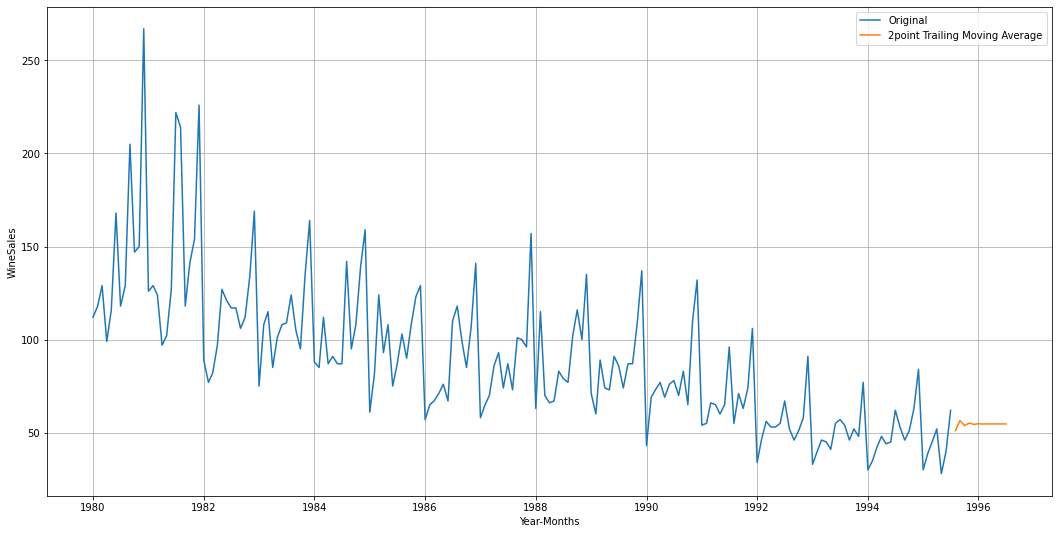

In [480]:
## Plotting the original time series and the forecast for 12 months using 2 point moving average

plt.figure(figsize=(18,9))
plt.plot(original['Rose'], label='Original')

plt.plot(forecastMA, label='2point Trailing Moving Average')

plt.xlabel('Year-Months')
plt.ylabel('WineSales')
plt.legend(loc='best')
plt.grid();

Even if this method is giving less MAPE on test data, the forecasted values does not seem much promising.
Hence we will go ahead with our Triple Exponential Smoothing model